# Visualizing Data in Python (Week 4)

## Pre-load A Sample Dataset (The `Iris` Dataset)

In [75]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matplotlib

* Project site: https://matplotlib.org/
* Gallery of useful examples: https://matplotlib.org/gallery/index.html
* Detailed tutorials: https://matplotlib.org/tutorials/index.html

#### Important: Include this line to ensure matplotlib plots show correctly inside Jupyter Notebooks

In [76]:
%matplotlib inline

### Basic Usage

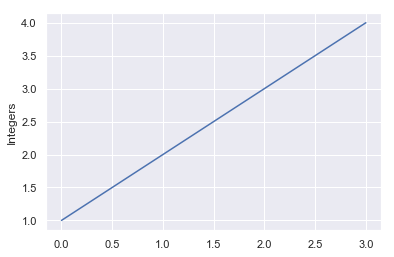

In [77]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('Integers')
plt.show()  #optional inside a Jupyter notebook


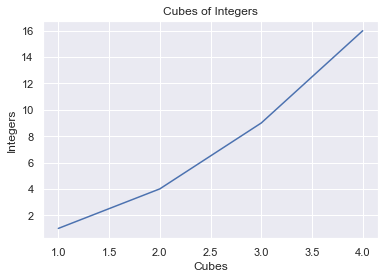

In [78]:
x = [1, 2, 3, 4]
y = [x ** 2 for x in x]  # this is an example of a list comprehension

plt.plot(x, y)
plt.ylabel('Integers')
plt.xlabel('Cubes')
plt.title('Cubes of Integers')
plt.show()  #optional inside a Jupyter notebook


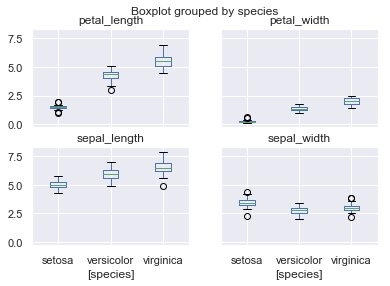

In [79]:
import matplotlib.pyplot as plt
iris.boxplot(by='species')
plt.show()

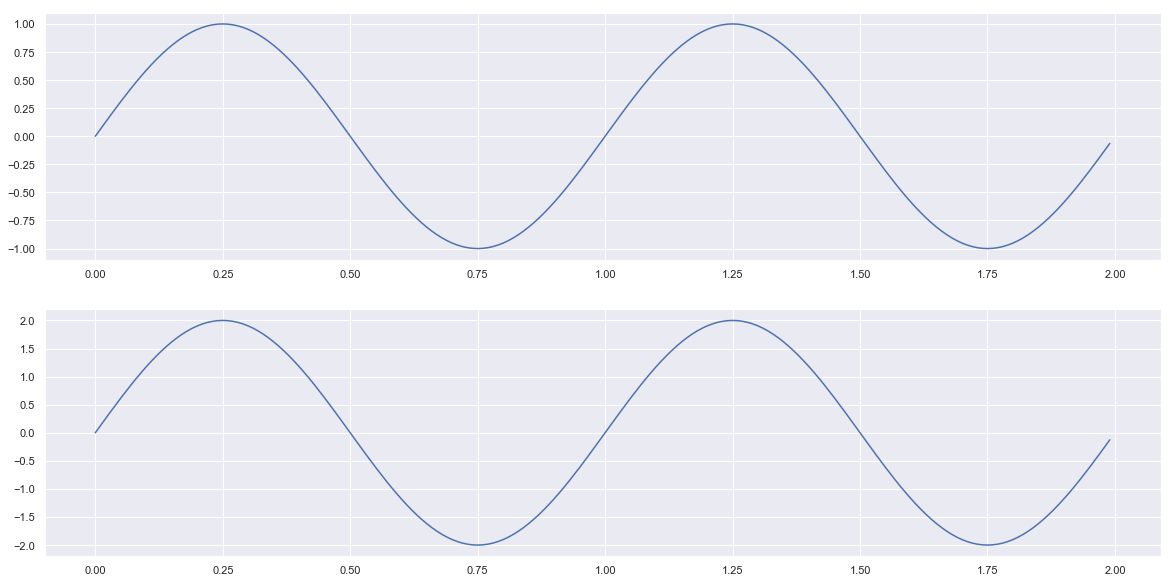

In [80]:
import numpy as np

# create some random data
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

# create plot(s)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)


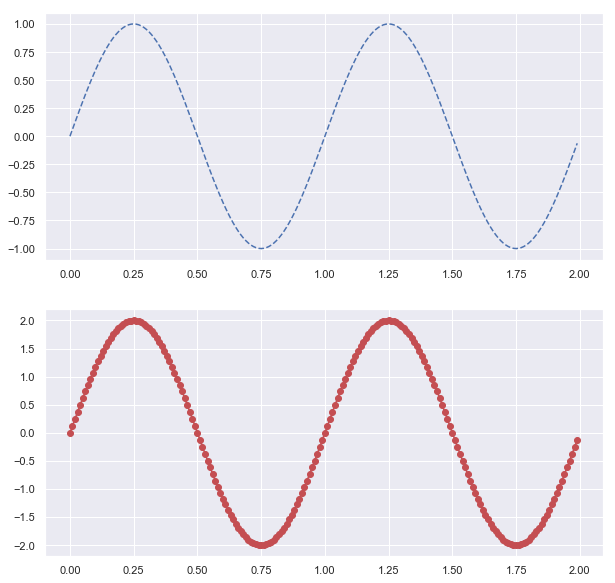

In [81]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(t, s1, 'b--')
plt.subplot(212)
plt.plot(t, 2*s1, 'ro-')

### Scatter Plots

Text(0.5, 1.0, 'Scatter Plot')

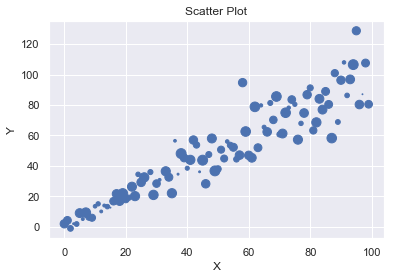

In [82]:
# create simulated data
num_obs = 100
x = np.arange(num_obs)
y = x + 2* np.random.randn(num_obs) + x * np.random.randn(num_obs) * 0.2
z = np.random.rand(num_obs) * 100

# build the plot
plt.scatter(x, y, s=z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

### Categorical Variable Plots

Text(0.5, 0.98, 'Categorical Plotting')

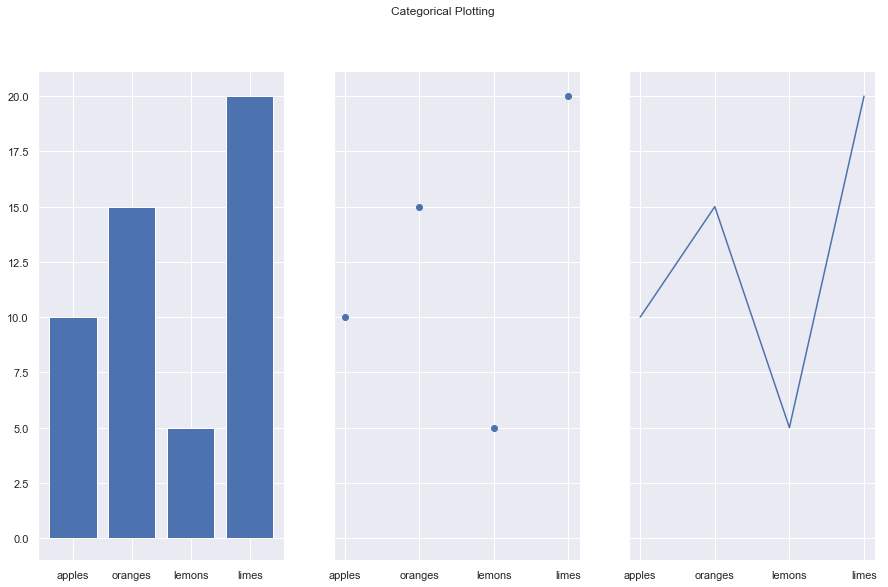

In [83]:
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 9), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

#### Boxplots with Custom Fill-in Colors

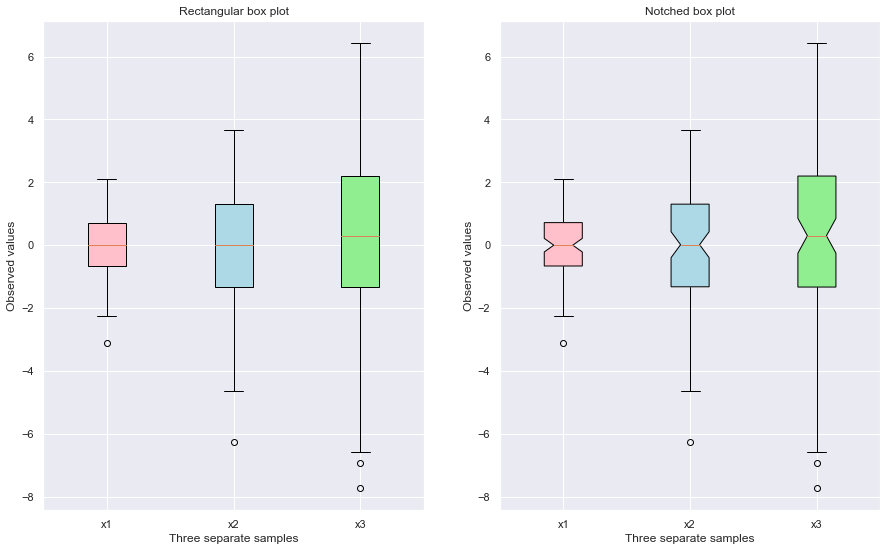

In [84]:
# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

More on using `plt.subplots` here: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html

### Seaborn
* main package site: https://seaborn.pydata.org/
* examples gallery: https://seaborn.pydata.org/examples/index.html

#### A Simple Example

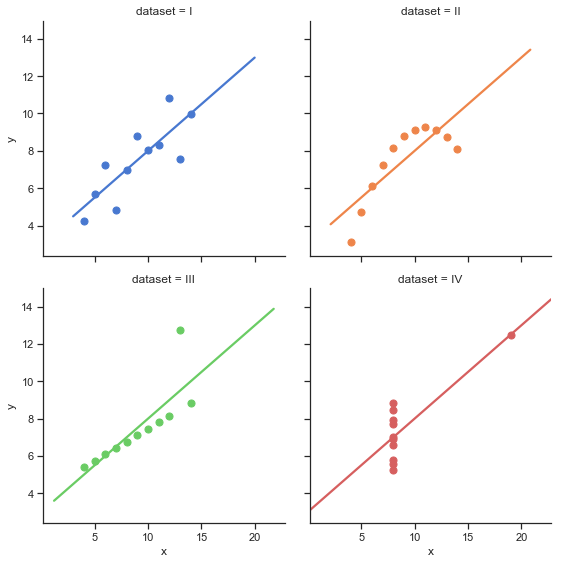

In [85]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

#### A Fancier Example

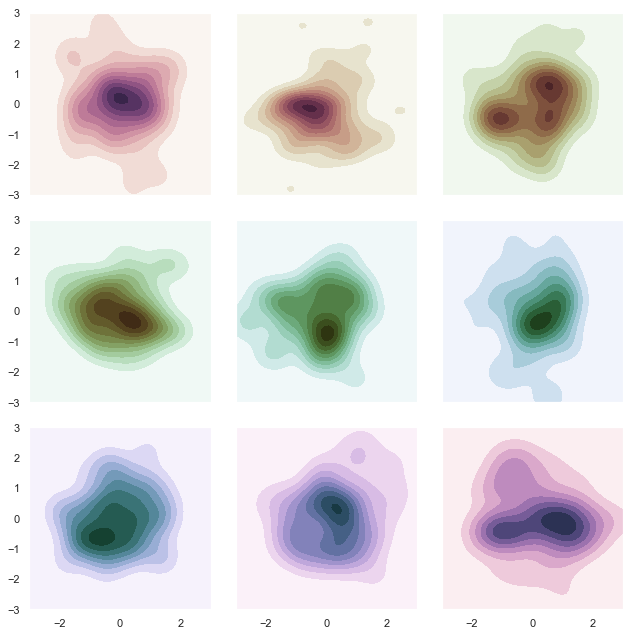

In [86]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

#### Timeseries Plots

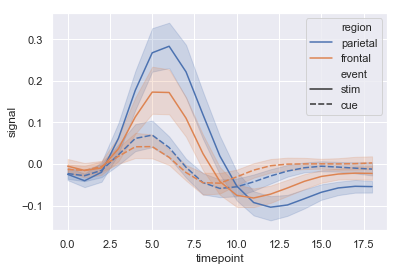

In [87]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

#### Cluster Map

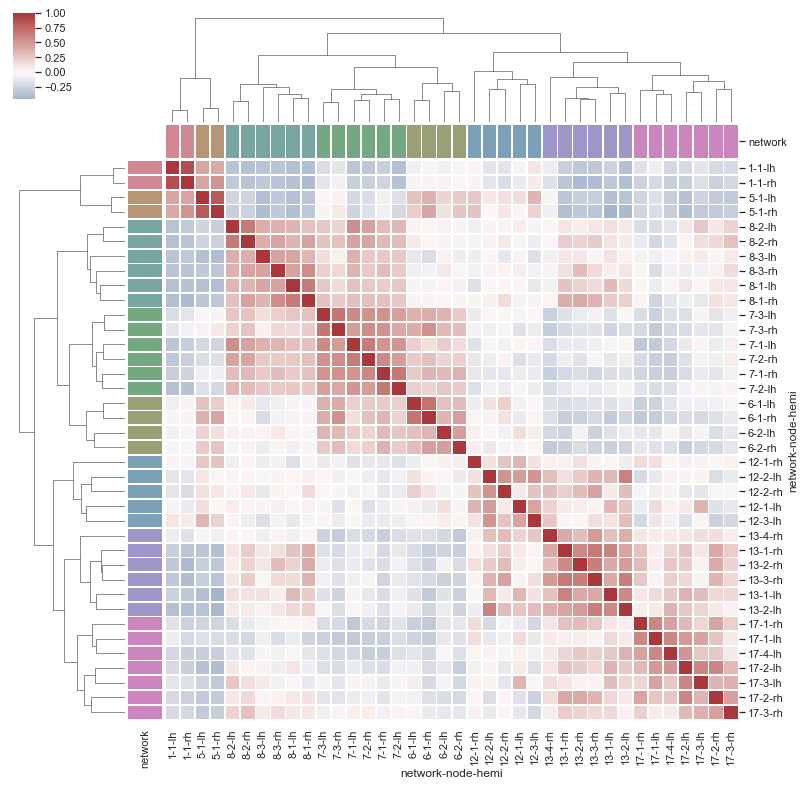

In [88]:
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

#### Linear Regression Plots

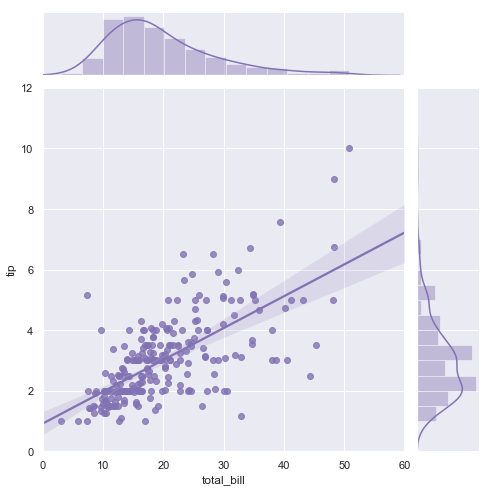

In [89]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

In [90]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


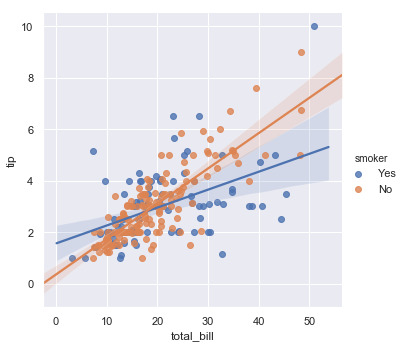

In [91]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

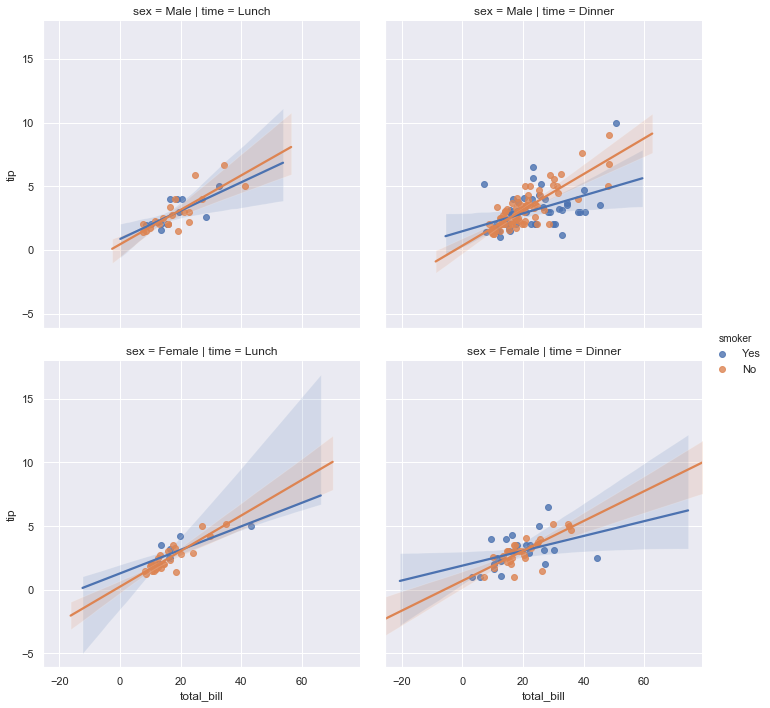

In [92]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=tips)

## Bookeh

* main project site: https://bokeh.pydata.org/en/latest/
* examples gallery: https://bokeh.pydata.org/en/latest/docs/gallery.html#gallery
* Jupyter notebook examples: https://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb

In [93]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

#### Important: Include this line to ensure Bookeh plots display correctly inside Jupyter notebook

In [94]:
output_notebook()

Loading BokehJS ...

#### A Simple Example

In [95]:
# generate simulated data
x = np.linspace(-6, 6, 100)
y = np.cos(x)

# create Bookeh plot
p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

#### A Fuller Example

In [96]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p)


#### Linked Brushing

In [97]:
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.sampledata.autompg import autompg

source = ColumnDataSource(autompg)

options = dict(plot_width=300, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(title="MPG by Year", **options)
p1.circle("yr", "mpg", color="blue", source=source)

p2 = figure(title="HP vs. Displacement", **options)
p2.circle("hp", "displ", color="green", source=source)

p3 = figure(title="MPG vs. Displacement", **options)
p3.circle("mpg", "displ", size="cyl", line_color="red", fill_color=None, source=source)

p = gridplot([[ p1, p2, p3]], toolbar_location="right")

show(p)